# Ансамблевые модели

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets


iris = datasets.load_iris()

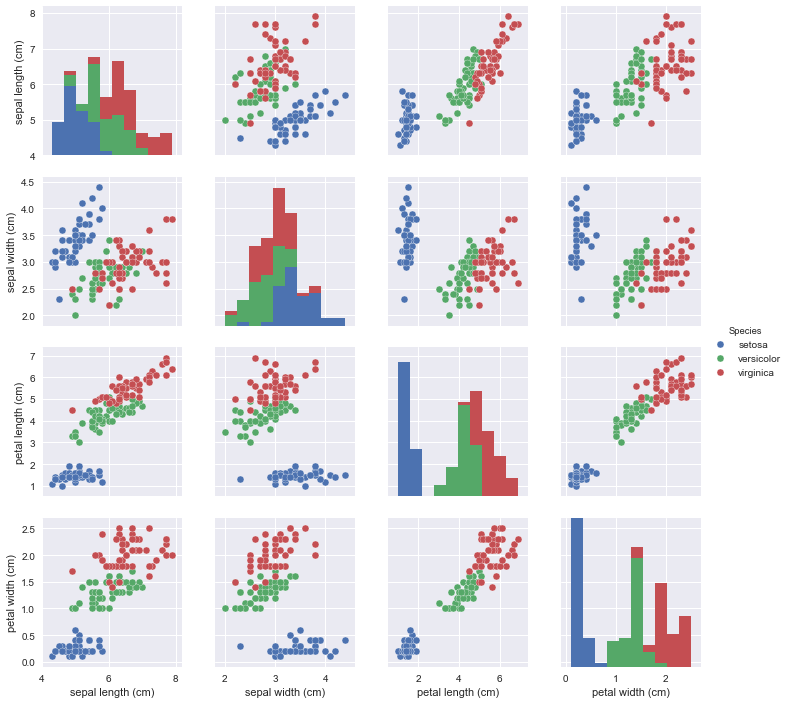

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = np.array([iris.target_names[cls] for cls in iris.target])
sns.pairplot(iris_df, hue='Species')

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target,
    test_size=0.3, stratify=iris.target, random_state=42
)
rf_model = random_forest.fit(x_train, y_train)

In [6]:
predictions = rf_model.predict(x_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))

Accuracy: 0.89


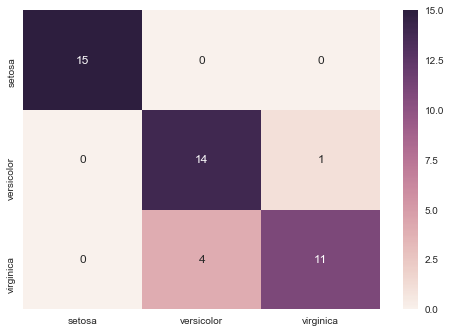

In [7]:
confusion_scores = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_scores, columns=iris.target_names, index=iris.target_names)
sns.heatmap(confusion_df, annot=True)

In [8]:
feature_importance = list(zip(iris.feature_names, rf_model.feature_importances_))
feature_importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'RF Importance'])
feature_importance_df

,Feature,RF Importance
0,sepal length (cm),0.120608
1,sepal width (cm),0.024273
2,petal length (cm),0.400227
3,petal width (cm),0.454892


In [9]:
rf_model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [10]:
from sklearn.ensemble import GradientBoostingClassifier


gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model = gradient_boosting.fit(x_train, y_train)

print('Accuracy: {:.2f}'.format(gb_model.score(x_test, y_test)))

Accuracy: 0.96


In [11]:
feature_importance_df['GB Importance'] = gb_model.feature_importances_
feature_importance_df

,Feature,RF Importance,GB Importance
0,sepal length (cm),0.120608,0.023629
1,sepal width (cm),0.024273,0.144759
2,petal length (cm),0.400227,0.338059
3,petal width (cm),0.454892,0.303553


In [12]:
gb_model.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}